In [1]:
# Imports
import sys
import os
from datetime import datetime
from datetime import date
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
from darts import TimeSeries
from darts.models import ExponentialSmoothing
from darts.metrics import mape
import matplotlib.pyplot as plt

# To import the main.py file
sys.path.append('../')
from python_files import main

# Getting all the data
confirmed_global, deaths_global, recovered_global, country_cases = main.collect_data()

# Time Series forecasting with an Exponential Smoothing Model

In [2]:
# Setting up plotly to work offline and in jupyter notebooks
pyo.init_notebook_mode(connected = True)
%matplotlib inline

In [3]:
pd.options.display.float_format = '{:.5f}'.format

In [4]:
def predict(country_name):
    cases = main.get_new_cases(country_name)
    is_0 = cases['cases'] != 0
    cases = cases[is_0]
    split_ratio = 0.8
    train_size = int(split_ratio * len(cases))
    train_df, test_df = cases.iloc[:train_size, :], cases.iloc[train_size:, :]
    train, test = TimeSeries.from_dataframe(train_df, 'date', 'cases'), TimeSeries.from_dataframe(test_df, 'date', 'cases')
    time_series = TimeSeries.from_dataframe(cases, 'date', 'cases')
    model = ExponentialSmoothing(trend = 'mul', seasonal = 'add', seasonal_periods = 2)
    model.fit(train)
    prediction = model.predict(len(test) + 30)
    pred_df = TimeSeries.pd_dataframe(prediction)
    pred_df['date'] = pred_df.index
    pred_df.index = [x for x in range(len(pred_df))]
    pred_df.rename(columns = {0: 'cases'}, inplace = True)
    pred_df['date'] = pd.to_datetime(pred_df['date'],unit='ms')
    print(pred_df)
    time_series.plot(label='actual', lw=3)
    prediction.plot(label='forecast', lw=3)
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Cases')
    err = mape(test, prediction)
    print(err)
    return pred_df

           cases       date
0   585982.96696 2020-06-30
1   605688.35821 2020-07-01
2   625964.10800 2020-07-02
3   646835.48365 2020-07-03
4   668311.22186 2020-07-04
..           ...        ...
64 4163380.23468 2020-09-02
65 4287414.54975 2020-09-03
66 4415061.80530 2020-09-04
67 4546436.00057 2020-09-05
68 4681637.19189 2020-09-06

[69 rows x 2 columns]
4.032843243082715


1924575.3392475909

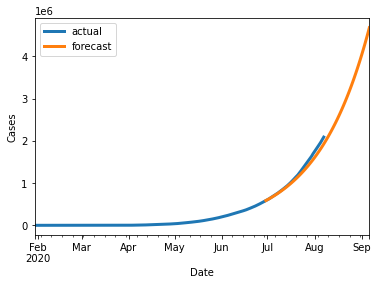

In [5]:
predict('India').at[38, 'cases']

           cases       date
0  2590013.12168 2020-06-29
1  2630575.61327 2020-06-30
2  2671692.63153 2020-07-01
3  2713234.99453 2020-07-02
4  2755343.63926 2020-07-03
..           ...        ...
65 6552249.43016 2020-09-02
66 6640412.96032 2020-09-03
67 6729566.23053 2020-09-04
68 6819856.94856 2020-09-05
69 6911162.92553 2020-09-06

[70 rows x 2 columns]
5.629631953180299


4529954.089728173

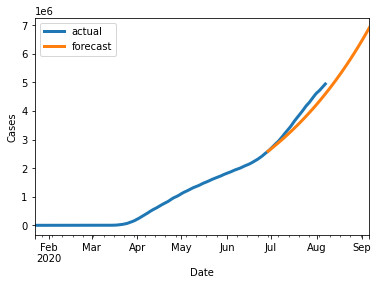

In [6]:
predict('US').at[38, 'cases']

/home/anirudh/.local/lib/python3.8/site-packages/statsmodels/tsa/holtwinters.py:743: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



         cases       date
0   7914.12748 2020-06-30
1   7991.01615 2020-07-01
2   8072.78452 2020-07-02
3   8150.70990 2020-07-03
4   8233.52176 2020-07-04
..         ...        ...
64 14172.07316 2020-09-02
65 14289.85312 2020-09-03
66 14412.77997 2020-09-04
67 14532.13278 2020-09-05
68 14656.64276 2020-09-06

[69 rows x 2 columns]
21.780543391676055


,cases,date
0,7914.12748,2020-06-30
1,7991.01615,2020-07-01
2,8072.78452,2020-07-02
3,8150.70990,2020-07-03
4,8233.52176,2020-07-04
...,...,...
64,14172.07316,2020-09-02
65,14289.85312,2020-09-03
66,14412.77997,2020-09-04
67,14532.13278,2020-09-05


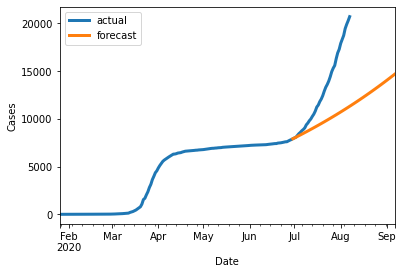

In [7]:
predict('Australia')